In [1]:
from line_profiles import *

### Example of using line_profiles code

Demonstrates the use of the line_profiles code by reproducing Fig. 5 and bottom left panel of Fig. 10

In [42]:
def compute_model_gh(xx, err, mean, sigma, h3, h4):
    '''
        Computes the pdf of the new models, the ln(pdf) and the Gauss-Hermite series
    '''
    
    if h4>=0.:
        pdf = laplace_kernel_pdf(xx,err,mean,sigma,h3,h4)
        ln_pdf = ln_laplace_kernel_pdf(xx,err,mean,sigma,h3,h4)
    if h4<0.:
        pdf = uniform_kernel_pdf(xx,err,mean,sigma,h3,h4)
        ln_pdf = ln_uniform_kernel_pdf(xx,err,mean,sigma,h3,h4)
        
    gh = gauss_hermite_series(xx,[1./(1.+np.sqrt(3./8.)*h4),mean,sigma,h3,h4])
    
    # Normalize where GH>0
    gh /= np.sum(gh[gh>0.])*np.diff(xx)[0]
    
    return pdf, ln_pdf, gh

/data/jls/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


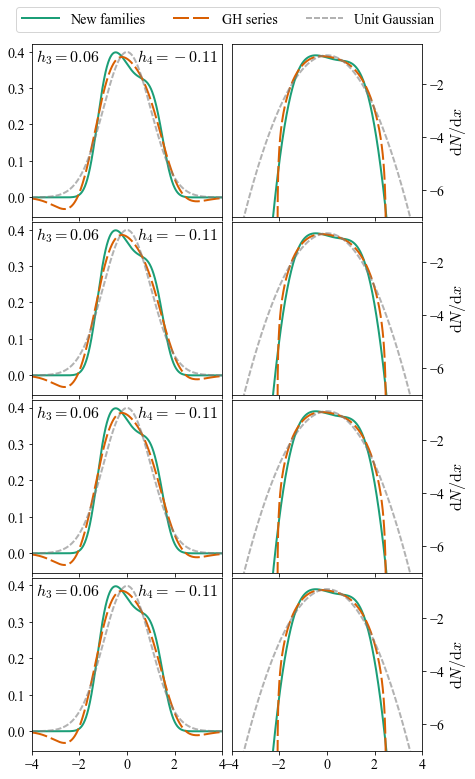

In [48]:
f,a=plt.subplots(4,2,figsize=[7.,13.],sharex=True)
plt.subplots_adjust(hspace=0.03,wspace=0.05)

err, mean, sigma = 0., 0., 1.

xx = np.linspace(-14,14,5000)

h3h4 = [(0.,0.11), (0.06, 0.11), (0., -0.11), (0.06, -0.11)]

h3h4 = [(0.06,-0.11),(0.06,-0.11),(0.06,-0.11),(0.06,-0.11)]
for ii, (h3, h4) in enumerate(h3h4):
    
    plt.ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
    
    pdf, ln_pdf, gh = compute_model_gh(xx, err, mean, sigma, h3, h4)
    
    # Plot pdf
    plt.sca(a[ii][0])
    plt.plot(xx,pdf,lw=2,label='New families')
    l,=plt.plot(xx,gh,lw=2,ls='dashed',label='GH series')
    l.set_dashes((8,2))
    l,=plt.plot(xx,alpha(xx),color='gray',alpha=0.6,lw=2,ls='dashed',label='Unit Gaussian')
    l.set_dashes((3,1))
    plt.annotate(r'$h_3=%0.2f$'%h3,xy=(0.02,0.98),xycoords='axes fraction',va='top',fontsize=16)
    plt.annotate(r'$h_4=%0.2f$'%h4,xy=(0.98,0.98),xycoords='axes fraction',va='top',ha='right',fontsize=16)
    plt.xlim(-4,4)
    if ii==0:
        plt.legend(loc='lower center', bbox_to_anchor=(1.03,1.03),ncol=3,handlelength=4*2/3)
    
    # Plot ln(pdf)
    plt.sca(a[ii][1])
    plt.plot(xx,ln_pdf,lw=2,label='New families')
    l,=plt.plot(xx,np.log(gh),lw=2,ls='dashed',label='GH series')
    l.set_dashes((8,2))
    l,=plt.plot(xx,np.log(alpha(xx)),color='gray',alpha=0.6,lw=2,ls='dashed',label='Unit Gaussian')
    l.set_dashes((3,1))
    plt.xlim(-4,4)
    plt.ylim(-7,-0.5)
    plt.gca().yaxis.set_label_position("right")
    plt.gca().yaxis.tick_right()
    

0.0


/home/jls/work/data/gaiadr2/virac/line_profiles/github/line_profiles.py:589: RuntimeWarning: invalid value encountered in sqrt
  


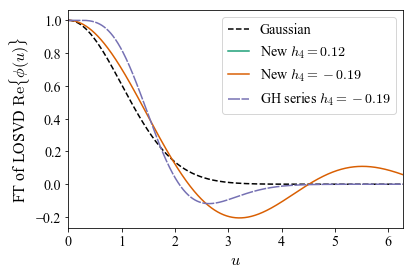

In [13]:
import seaborn as sns
sns.set_palette("Dark2")

from ppxf.ppxf import losvd_rfft

factor=2.5
sigma = 1.
mean = 0
sigma_diff=0.
nl=10000
w = np.linspace(0, np.pi*factor*sigma, nl)

fft=np.conj(losvd_rfft(np.array([mean,sigma,0,0]),1,[4],nl,1,0,factor,sigma_diff))
plt.plot(w,np.real(fft).flatten(),color='k',ls='dashed',label='Gaussian')

h3, h4 = 0., 0.12
fftK=np.conj(ppxf_losvd_rfft_new_family(np.array([mean,sigma,h3,h4]),1,[4],nl,1,0,factor,sigma_diff))
plt.plot(w,np.real(fftK).flatten(),label=r'New $h_4=0.12$')

h3, h4 = 0., -0.19
fftK=np.conj(ppxf_losvd_rfft_new_family(np.array([mean,sigma,h3,h4]),1,[4],nl,1,0,factor,sigma_diff))
plt.plot(w,np.real(fftK).flatten(),label=r'New $h_4=-0.19$')

h3, h4 = 0., -0.19
fftK=np.conj(losvd_rfft(np.array([mean,sigma,h3,h4]),1,[4],nl,1,0,factor,sigma_diff)/(1.+np.sqrt(3./8.)*h4))
l,=plt.plot(w,np.real(fftK).flatten(),ls='dashed',label=r'GH series $h_4=-0.19$')
l.set_dashes((8,1))

plt.xlabel(r'$u$')
plt.ylabel(r'FT of LOSVD $\mathrm{Re}\{\phi(u)\}$')
plt.xlim(0.,2.*np.pi)
plt.legend(handlelength=1.5)